In [1]:
%matplotlib inline
import os
import random
import pickle
import numpy as np
import matplotlib.pyplot
from matplotlib.pyplot import imshow
import keras
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions, preprocess_input
from keras.models import Model
from sklearn.decomposition import PCA
from scipy.spatial import distance
from tqdm import tqdm

Using TensorFlow backend.


In [2]:
model = keras.applications.VGG16(weights='imagenet', include_top=True)

Instructions for updating:
Colocations handled automatically by placer.


In [3]:
# get_image will return a handle to the image itself, and a numpy array of its pixels to input the network
def get_image(path):
    img = image.load_img(path, target_size=model.input_shape[1:3])
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

predicted mobile_home with probability 0.407
predicted fire_engine with probability 0.062
predicted tow_truck with probability 0.060
predicted recreational_vehicle with probability 0.060
predicted amphibian with probability 0.045


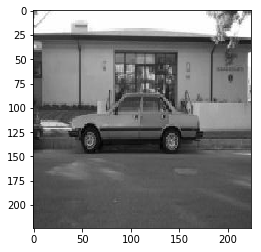

In [4]:
img, x = get_image("101_ObjectCategories/car_side/image_0002.jpg")
predictions = model.predict(x)
imshow(img)
for pred in decode_predictions(predictions)[0]:
    print("predicted %s with probability %0.3f" % (pred[1], pred[2]))

In [5]:
feat_extractor = Model(inputs=model.input, outputs=model.get_layer("fc2").output)
#feat_extractor.summary()

In [6]:
images_path = '101_ObjectCategories'
max_num_images = 10000

images = [os.path.join(dp, f) for dp, dn, filenames in os.walk(images_path) for f in filenames if os.path.splitext(f)[1].lower() in ['.jpg','.png','.jpeg']]
if max_num_images < len(images):
    images = [images[i] for i in sorted(random.sample(xrange(len(images)), max_num_images))]

print("keeping %d images to analyze" % len(images))

keeping 9144 images to analyze


In [10]:
features = []
for image_path in tqdm(images):
    img, x = get_image(image_path);
    feat = feat_extractor.predict(x)[0]
    features.append(feat)

100%|██████████| 9144/9144 [11:28:43<00:00,  4.52s/it]  


In [8]:
features = pickle.load( open( "/Users/vaibhavverdhan/Capabilities/ImageSearchEngine/features_caltech101.p", "rb" ) )

In [9]:
len(features)

2

In [10]:
features = np.array(features[1])
pca = PCA(n_components=300)
pca.fit(features)
pca_features = pca.transform(features)

In [11]:
def get_closest_images(query_image_idx, num_results=5):
    distances = [ distance.euclidean(pca_features[query_image_idx], feat) for feat in pca_features ]
    idx_closest = sorted(range(len(distances)), key=lambda k: distances[k])[1:num_results+1]
    return idx_closest

def get_concatenated_images(indexes, thumb_height):
    thumbs = []
    for idx in indexes:
        img = image.load_img(images[idx])
        img = img.resize((int(img.width * thumb_height / img.height), thumb_height))
        thumbs.append(img)
    concat_image = np.concatenate([np.asarray(t) for t in thumbs], axis=1)
    return concat_image

Text(0.5, 1.0, 'result images')

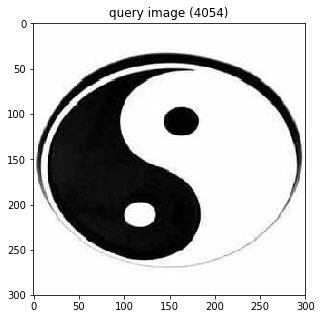

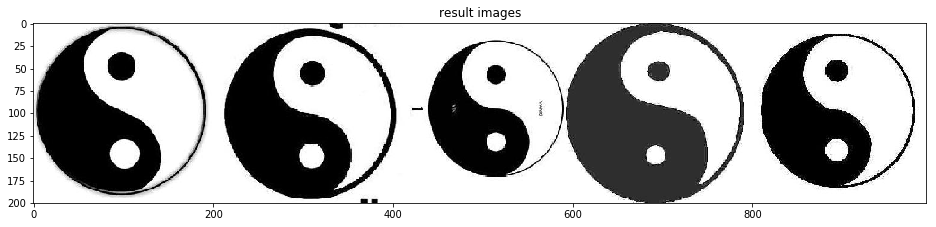

In [12]:
#Now lets do the query for an image. We will select an image and see the results
query_image_idx = int(len(images) * random.random())
idx_closest = get_closest_images(query_image_idx)
query_image = get_concatenated_images([query_image_idx], 300)
results_image = get_concatenated_images(idx_closest, 200)

# display the query image
matplotlib.pyplot.figure(figsize = (5,5))
imshow(query_image)
matplotlib.pyplot.title("query image (%d)" % query_image_idx)

# display the resulting images
matplotlib.pyplot.figure(figsize = (16,12))
imshow(results_image)
matplotlib.pyplot.title("result images")

In [13]:
def getImagesWhichAreSimilar(query_image_idx, num_results=4):
    distances = [ distance.euclidean(pca_features[query_image_idx], feat) for feat in pca_features ]
    idx_closest = sorted(range(len(distances)), key=lambda k: distances[k])[1:num_results+1]
    return idx_closest

def concatImages(indexes, thumb_height):
    thumbs = []
    for idx in indexes:
        img = image.load_img(images[idx])
        img = img.resize((int(img.width * thumb_height / img.height), thumb_height))
        thumbs.append(img)
    concat_image = np.concatenate([np.asarray(t) for t in thumbs], axis=1)
    return concat_image

In [11]:
pickle.dump([images, pca_features], open('/Users/vaibhav.verdhan/Documents/Self/Self/ImageSearchEngine/features_caltech101.p', 'wb'))

In [14]:
def searchTheImage(index_of_query_image):
    index_of_close_image = getImagesWhichAreSimilar(index_of_query_image)
    query_image = concatImages([index_of_query_image], 100)
    results_image = concatImages(index_of_close_image, 100)

    # display the query image
    matplotlib.pyplot.figure(figsize = (5,5))
    imshow(query_image)
    matplotlib.pyplot.title("The index queried Image is (%d)" % index_of_query_image)

    # display the resulting images
    matplotlib.pyplot.figure(figsize = (16,12))
    imshow(results_image)
    matplotlib.pyplot.title("The Resultant Images returned are")

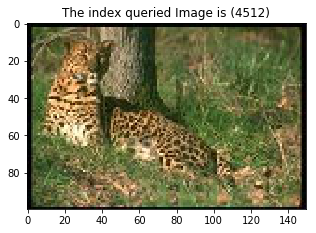

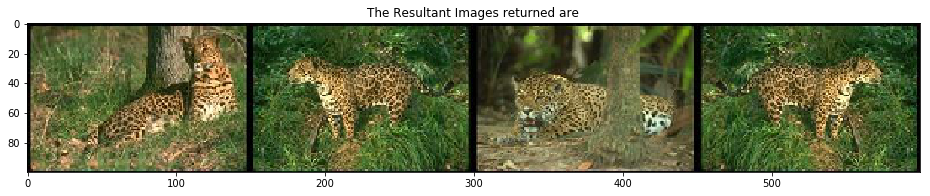

In [15]:
searchTheImage(4512)

Text(0.5, 1.0, 'The Images returned are')

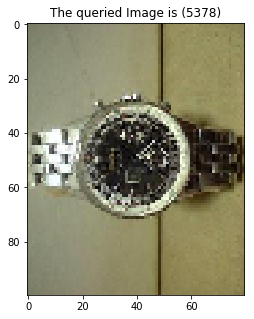

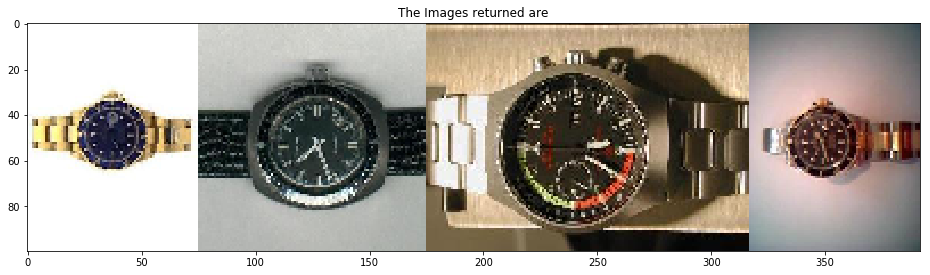

In [16]:
#Now lets do the query for an image. We will select an image and see the results
index_of_query_image = 4512 ## Image of the tiger
index_of_query_image = 4000 ## Image of the football
index_of_query_image = 5378 ## Image of a wrist watch

index_of_close_image = getImagesWhichAreSimilar(index_of_query_image)
query_image = concatImages([index_of_query_image], 100)
results_image = concatImages(index_of_close_image, 100)

# display the query image
matplotlib.pyplot.figure(figsize = (5,5))
imshow(query_image)
matplotlib.pyplot.title("The queried Image is (%d)" % index_of_query_image)

# display the resulting images
matplotlib.pyplot.figure(figsize = (16,12))
imshow(results_image)
matplotlib.pyplot.title("The Images returned are")

## Search Using an Image

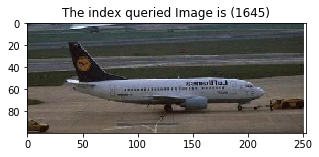

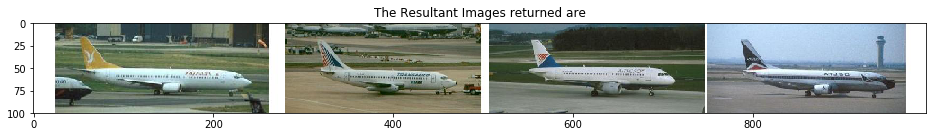

In [23]:
searchTheImage(1645) #1 #2681 #1645 